# About Dataset

Recycling trash is a crucial part of protecting our environment. Garbage must be divided into categories with similar recycling processes in order to enable the recycling process. The percentage of recycled waste can rise considerably if it is possible to separate domestic trash into several categories. Using the classes given, we will train the model in this notebook to categorize the input images and output the trash classification.

The six classification included in the **Garbage Classification Dataset** are: 
1.   cardboard (393) 
2.   glass (491)
3.   metal (400)
4.   paper(584)
5.   plastic (472)
6.   trash(127)
<br> 

The objective is to train the model to be able to predict the input images based on the provided classifications.

In [1]:
import tensorflow as tf
#import tensorflow.contrib.keras as keras
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow import keras
from PIL import Image
from pathlib import Path
import scipy
import os
import numpy as np
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
import torchvision.transforms as T


Load and transform data. 

In [3]:
data_dir = Path('Garbage\original_images')

transformer = T.Compose([T.Resize((32, 32)), T.ToTensor()])
dataset = ImageFolder(data_dir, transform = transformer)


print(dataset.classes)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\gupta\AppData\Local\Temp\ipykernel_7468\4158928959.py:1: SyntaxWarning: invalid escape sequence '\o'
  data_dir = Path('Garbage\original_images')


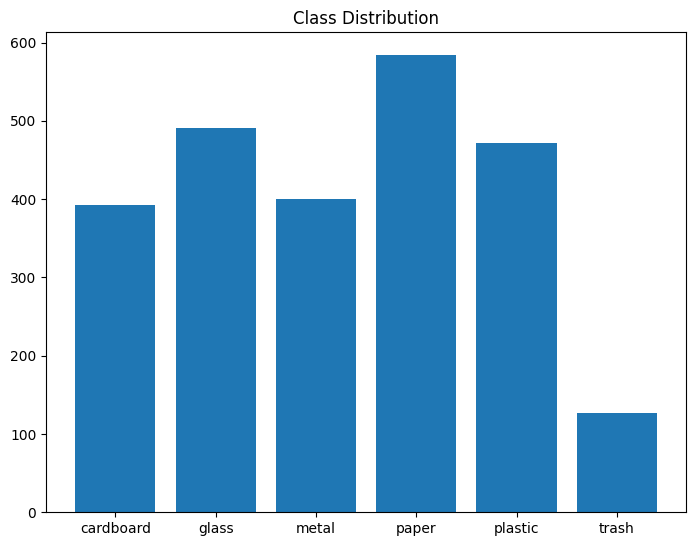

In [6]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
counts = [393,491,400,584,472,127]
ax.bar(dataset.classes,counts)
plt.title('Class Distribution')
plt.show()

In [4]:
PATH_TEST = r"Garbage\original_images"
PATH_TRAIN = r"Garbage\processed_images"
class_names = ['cardboard', 'glass', 'metal','paper','plastic','trash']

In [5]:
imagepath_cardboard = r"Garbage\original_images\cardboard"
graypath_cardboard = r"Garbage\processed_images\cardboard"
File_listing = os.listdir(imagepath_cardboard)
for file in File_listing:
    im = Image.open(imagepath_cardboard + '\\' + file) 
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_cardboard + '\\' + file, "JPEG")

In [9]:
imagepath_glass = r"Garbage\original_images\glass"
graypath_glass = r"Garbage\processed_images\glass"
File_listing = os.listdir(imagepath_glass)
for file in File_listing:
    im = Image.open(imagepath_glass + '\\' + file) 
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_glass + '\\' + file, "JPEG")

In [10]:
imagepath_metal = r"Garbage\original_images\metal"
graypath_metal = r"Garbage\processed_images\metal"
File_listing = os.listdir(imagepath_metal)
for file in File_listing:
    im = Image.open(imagepath_metal + '\\' + file) 
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_metal + '\\' + file, "JPEG")

In [11]:
imagepath_paper = r"Garbage\original_images\paper"
graypath_paper = r"Garbage\processed_images\paper"
File_listing = os.listdir(imagepath_paper)
for file in File_listing:
    im = Image.open(imagepath_paper + '\\' + file) 
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_paper + '\\' + file, "JPEG")

In [12]:
imagepath_plastic = r"Garbage\original_images\plastic"
graypath_plastic = r"Garbage\processed_images\plastic"
File_listing = os.listdir(imagepath_plastic)
for file in File_listing:
    im = Image.open(imagepath_plastic + '\\' + file) 
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_plastic + '\\' + file, "JPEG")

In [13]:
imagepath_trash = r"Garbage\original_images\trash"
graypath_trash = r"Garbage\processed_images\trash"
File_listing = os.listdir(imagepath_trash)
for file in File_listing:
    im = Image.open(imagepath_trash + '\\' + file) 
    img = im.resize((32,32))
    gray = img.convert('L')
    gray.save(graypath_trash + '\\' + file, "JPEG")

In [6]:
train_dir = os.path.join(PATH_TRAIN)
test_dir = os.path.join(PATH_TEST)

In [15]:
imagepath_cardboard_dir = os.path.join(imagepath_cardboard)
imagepath_glass_dir = os.path.join(imagepath_glass)
imagepath_metal_dir = os.path.join(imagepath_metal)
imagepath_paper_dir = os.path.join(imagepath_paper)
imagepath_plastic_dir = os.path.join(imagepath_plastic)
imagepath_trash_dir = os.path.join(imagepath_trash)

In [7]:
len(os.listdir(PATH_TRAIN))

6

In [17]:
IMG_HEIGHT = 32
IMG_WIDTH = 32

In [18]:
image_gen = ImageDataGenerator(rescale=1./255)

In [19]:
train_data_gen = image_gen.flow_from_directory(
    directory = train_dir, 
    shuffle=True, 
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical')                 #'categorical', returns 2D one-hot encoded label arrays

Found 2527 images belonging to 6 classes.


In [20]:
test_data_gen = image_gen.flow_from_directory(
    directory = test_dir, 
    shuffle=True, 
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical')

Found 2527 images belonging to 6 classes.


In [21]:
sample_data_gen = image_gen.flow_from_directory(
    directory = test_dir, 
    shuffle=True, 
    target_size = (200, 200),
    class_mode='categorical')

sample_training_images, _= next(sample_data_gen)
def plotImages(images_arr):
    fig, axes = plt.subplots(1,4, figsize=(30,30))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


Found 2527 images belonging to 6 classes.


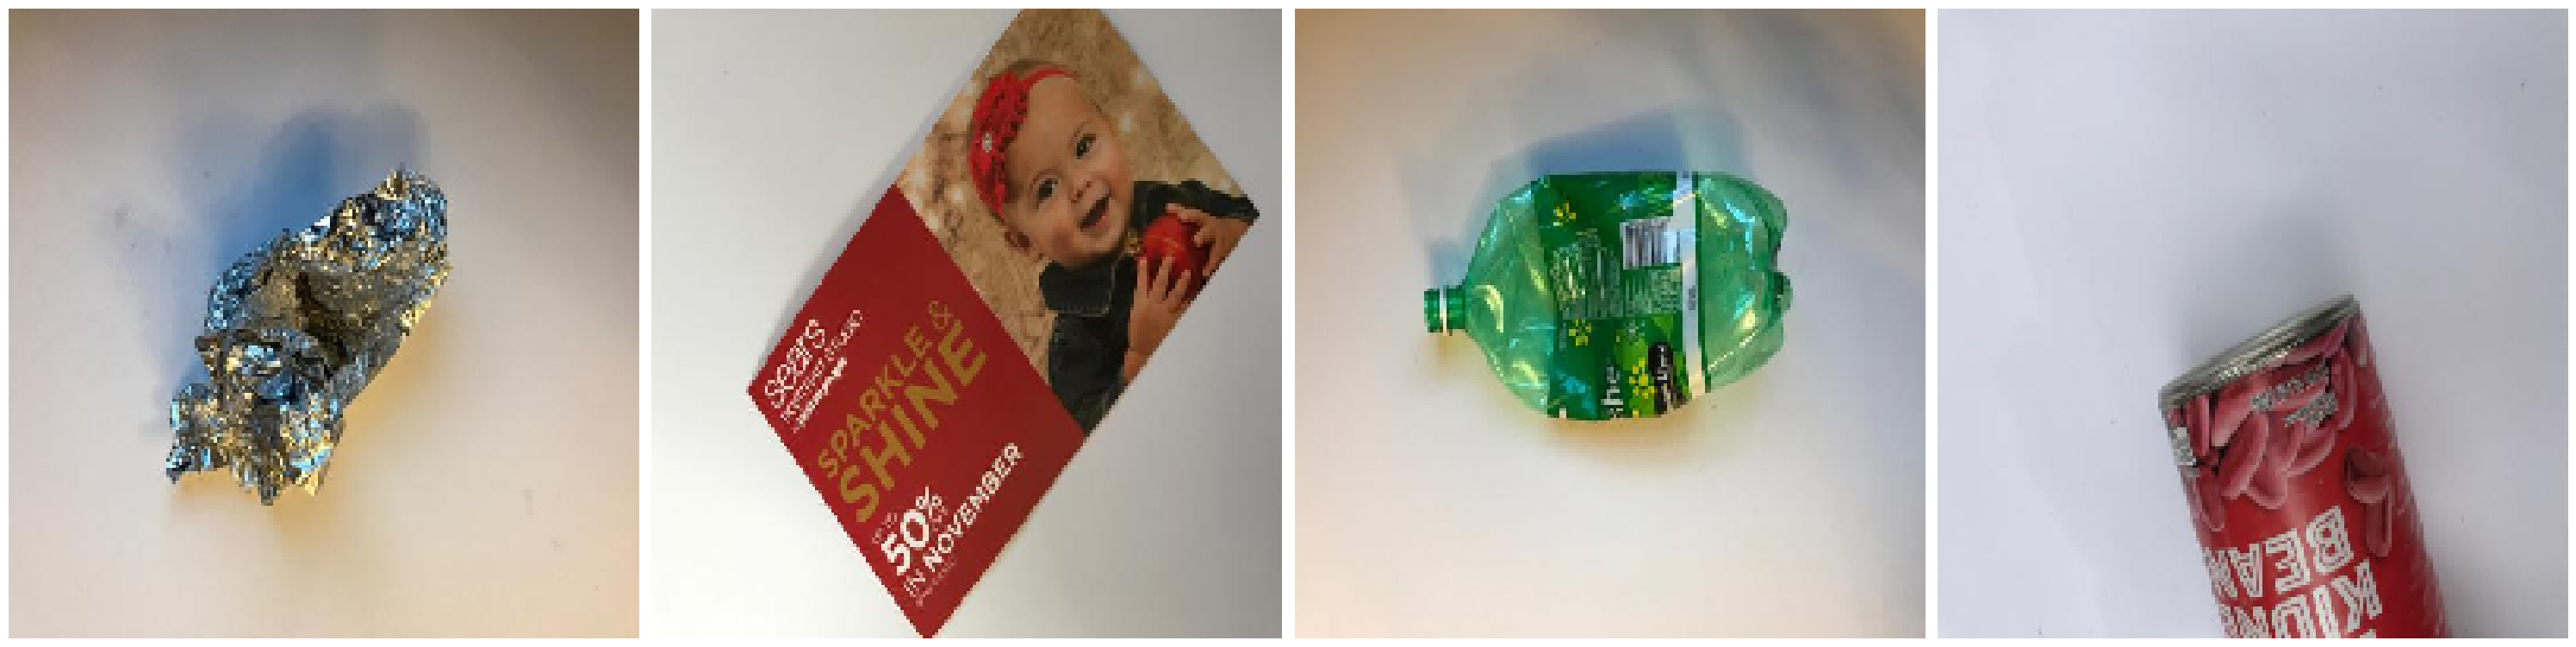

In [22]:
plotImages(sample_training_images[:4])

We are using ``Sequential`` model from Keras. It is a model to use when there is only one input and one output on the data you need to show. It is not appropriate to use this model if you have multiple inputs and outputs. It helps you train and infer conclusions from your model. the ``input_shape=(28,28)`` represent the resolution of the image: ***32 x 32*** pixels. ``Dense`` It creates a new dense layer and returns the necessary output data for your model to use. Activation is the element-wise activation function used to pass through the activation arguments,  relu is the rectified linear unit activation function, and Sigmoid is equivalent to a 2-element Softmax, where the second element is taken to be zero.

In [ ]:
'''model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Flatten(),

    Dense(6, activation='softmax')
])'''

**Step 7** : Defining an optimmizer, a loss function, and other useful training parameters.

In [24]:
batch_size = 45
epochs = 60
model.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,878 (187.02 KB)

 Trainable params: 47,878 (187.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#import visualkeras
#visualkeras.layered_view(model, legend=True, spacing=20)

In [ ]:
num_cardboard_train = len(os.listdir(imagepath_cardboard_dir))
num_glass_train = len(os.listdir(imagepath_glass_dir))
num_metal_train = len(os.listdir(imagepath_metal_dir))
num_paper_train = len(os.listdir(imagepath_cardboard_dir))
num_plastic_train = len(os.listdir(imagepath_glass_dir))
num_trash_train = len(os.listdir(imagepath_trash_dir))

num_cardboard_test = len(os.listdir(graypath_cardboard))
num_glass_test = len(os.listdir(graypath_glass))
num_metal_test = len(os.listdir(graypath_metal))
num_paper_test = len(os.listdir(graypath_paper))
num_plastic_test = len(os.listdir(graypath_plastic))
num_trash_test = len(os.listdir(graypath_trash))

total_train = num_cardboard_train + num_glass_train + num_metal_train + num_paper_train + num_plastic_train + num_trash_train
total_test = num_cardboard_test + num_glass_test + num_metal_test + num_paper_test + num_plastic_test + num_trash_test

In [ ]:
history = model.fit(
    train_data_gen,
    validation_data = train_data_gen,
    steps_per_epoch= total_train // batch_size,
    epochs = epochs,
    validation_steps= total_test // batch_size,
    callbacks = [tf.keras.callbacks.EarlyStopping(
                monitor='val_loss',
                min_delta=0.01,
                patience=7)]
)

Epoch 1/60
52/52 [==============================] - 17s 318ms/step - loss: 1.7310 - accuracy: 0.2291 - val_loss: 1.7209 - val_accuracy: 0.2467
Epoch 2/60
52/52 [==============================] - 6s 107ms/step - loss: 1.7051 - accuracy: 0.2598 - val_loss: 1.6693 - val_accuracy: 0.2349
Epoch 3/60
52/52 [==============================] - 4s 85ms/step - loss: 1.6228 - accuracy: 0.2892 - val_loss: 1.5717 - val_accuracy: 0.3482
Epoch 4/60
52/52 [==============================] - 5s 96ms/step - loss: 1.5400 - accuracy: 0.3636 - val_loss: 1.5166 - val_accuracy: 0.3449
Epoch 5/60
52/52 [==============================] - 5s 93ms/step - loss: 1.4760 - accuracy: 0.3879 - val_loss: 1.4331 - val_accuracy: 0.4297
Epoch 6/60
52/52 [==============================] - 5s 91ms/step - loss: 1.4269 - accuracy: 0.4342 - val_loss: 1.3399 - val_accuracy: 0.4749
Epoch 7/60
52/52 [==============================] - 5s 92ms/step - loss: 1.3674 - accuracy: 0.4600 - val_loss: 1.3171 - val_accuracy: 0.4760
Epoch 8/60

Epoch 59/60
52/52 [==============================] - 4s 75ms/step - loss: 0.2195 - accuracy: 0.9278 - val_loss: 0.1807 - val_accuracy: 0.9526
Epoch 60/60
52/52 [==============================] - 4s 76ms/step - loss: 0.2202 - accuracy: 0.9296 - val_loss: 0.2046 - val_accuracy: 0.9308


In [ ]:
test_loss, test_acc = model.evaluate(test_data_gen)
print('Test accuracy: {} Test Loss: {} '.format(test_acc*100, test_loss))

79/79 [==============================] - 5s 58ms/step - loss: 0.4392 - accuracy: 0.8504
Test accuracy: 85.04155278205872 Test Loss: 0.43915390968322754 


Below shows the evaluation of the model. It shows the accuracy and losses for training as the number of epoch increases. This model achieved the high overall 92% accuracy with the Adam optimizer and has 60 number of epoch. 

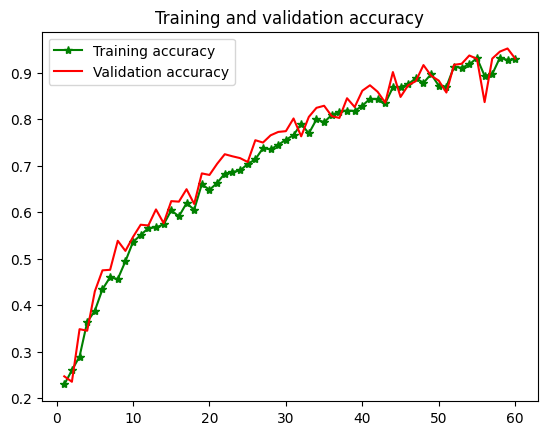

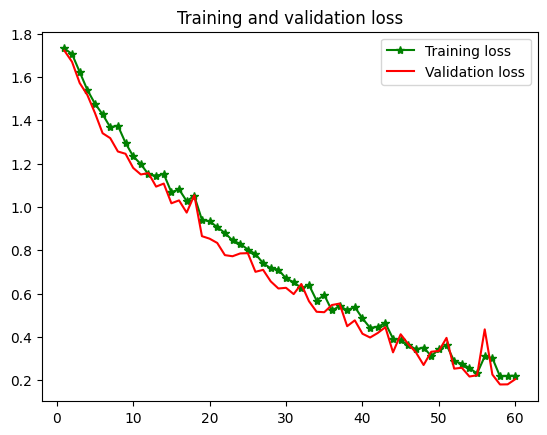

In [ ]:
train_acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
train_loss = history.history['loss'] 
val_loss = history.history['val_loss'] 

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'g*-', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'g*-', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

79/79 [==============================] - 5s 59ms/step


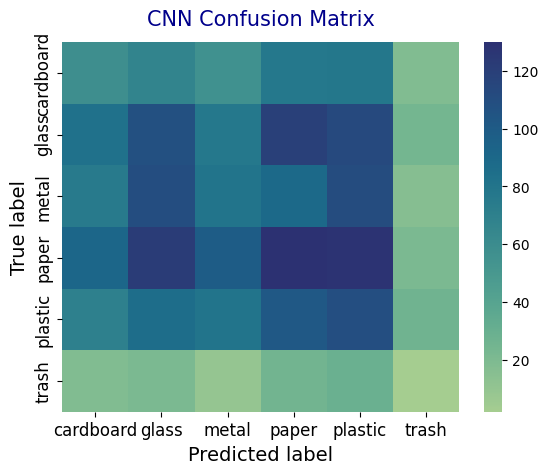

Classification Report
              precision    recall  f1-score   support

   cardboard       0.15      0.13      0.14       403
       glass       0.20      0.21      0.20       501
       metal       0.16      0.19      0.17       410
       paper       0.26      0.26      0.26       594
     plastic       0.15      0.15      0.15       482
       trash       0.04      0.03      0.03       137

    accuracy                           0.18      2527
   macro avg       0.16      0.16      0.16      2527
weighted avg       0.18      0.18      0.18      2527



In [ ]:
import pandas as pd
import seaborn as sns
from sklearn import metrics
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix

(X,y) = (train_data_gen[0], train_data_gen[1])
y_test = train_test_split(X,y,test_size=0.2, random_state=4)

nb_classes = 6
Y_train = model.predict(train_data_gen)
y_train = np.argmax(Y_train, axis=1)
Y_test = model.predict(test_data_gen)
y_test = np.argmax(Y_test, axis=1)
cm = confusion_matrix(y_test, y_train)

matrix = pd.DataFrame((metrics.confusion_matrix(y_test, y_train)), ('cardboard', 'glass', 'metal','paper','plastic','trash'),
                      ('cardboard', 'glass', 'metal','paper','plastic','trash'))

heatmap = sns.heatmap(matrix, annot = False, annot_kws = {'size': 14}, fmt = 'd', cmap = 'crest')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), fontsize = 12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), fontsize = 12)
plt.title('CNN Confusion Matrix', fontsize = 15, pad = 12, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

print('Classification Report')
target_names = ['cardboard', 'glass', 'metal','paper','plastic','trash']
print(classification_report(train_data_gen.classes, y_test, target_names=target_names,zero_division=0))

Metrics to achieve the desired accuracy are 60 epoch, 45 batch size, 0.01 learning rate, and an Adam optimizer

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)



print ("Cardboard Glass Metal Paper Plastic Trash")
ACC = (TP+TN)/(TP+FP+FN+TN)
print (ACC)

Cardboard Glass Metal Paper Plastic Trash
[0.74950534 0.6747131  0.71428571 0.65453106 0.67431737 0.91808469]


## Display Predictions (Random Images)

In [ ]:
from skimage.transform import resize 

In [26]:

import keras.utils as ku
import numpy as np
number_to_class = ['cardboard',\
                   'glass',\
                   'metal',
                   'paper',\
                   'plastic',\
                   'trash',]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


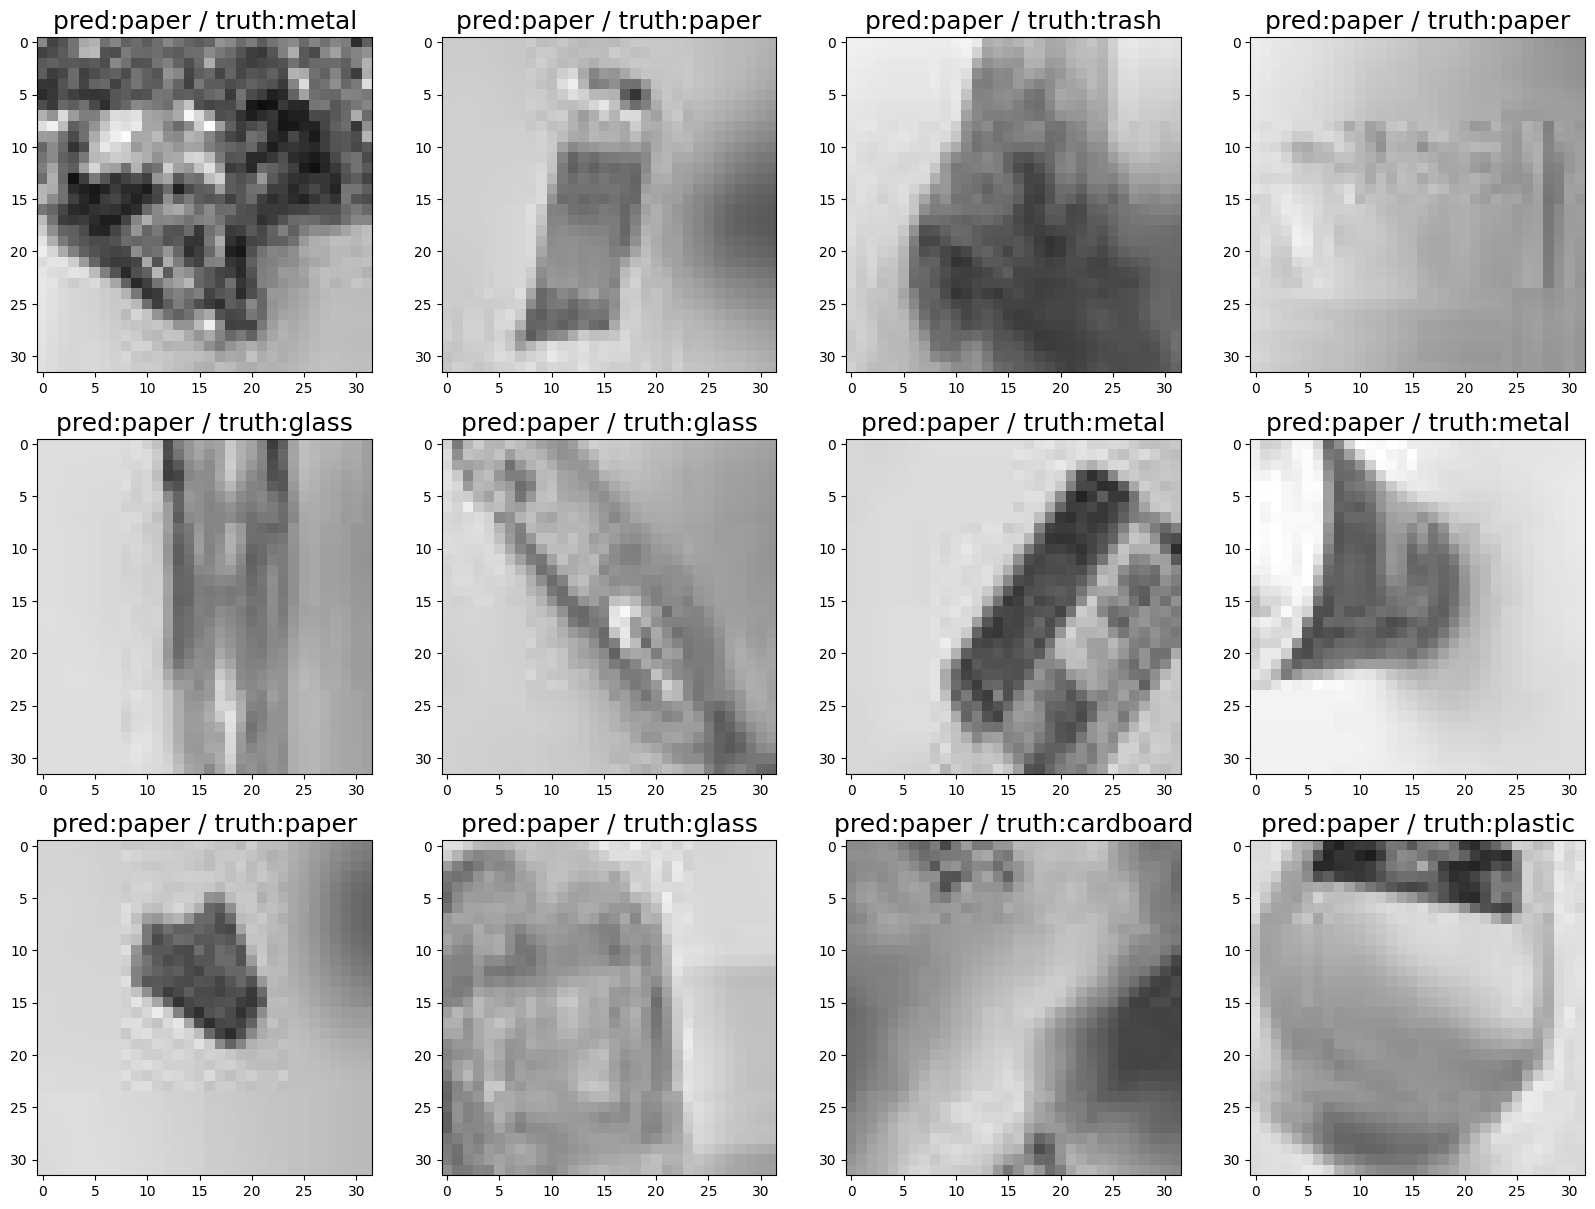

In [27]:
test_x, test_y = train_data_gen.__getitem__(1)
preds = model.predict(test_x)

plt.figure(figsize=(20, 20))
for i in range(12):
    plt.subplot(4,4, i+1)
    plt.title('pred:%s / truth:%s' % (number_to_class[np.argmax(preds[i])], number_to_class[np.argmax(test_y[i])]), size=18)
    plt.imshow(test_x[i])


---
### Class: Cardboard

---

1/1 [==============================] - 0s 30ms/step
Probability: 0.9574093
Classified: cardboard 
 cardboard


Text(0.5, 1.0, 'Loaded Image')

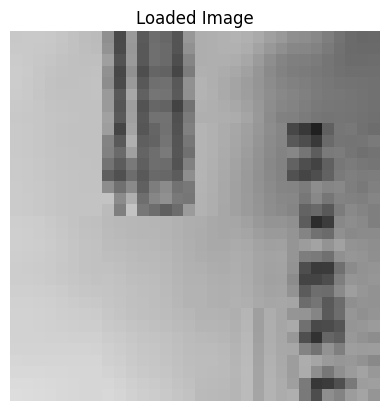

In [ ]:
test_img = 'Garbage/processed_images/cardboard/cardboard_321.jpg'
img = ku.load_img(test_img, target_size = (32,32))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = number_to_class[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n' , number_to_class[np.argmax(test_img[0])])

plt.axis('off')
plt.imshow(img.squeeze())
plt.imshow(img)
plt.title("Loaded Image")

---
### Class: Glass

---

1/1 [==============================] - 0s 27ms/step
Probability: 0.8717817
Classified: glass 



Text(0.5, 1.0, 'Loaded Image')

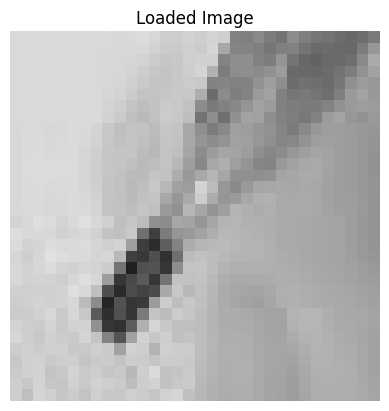

In [ ]:
test_img = 'Garbage/processed_images/glass/glass_341.jpg'
img = ku.load_img(test_img, target_size = (32,32))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = number_to_class[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

---
### Class: Metal
---

1/1 [==============================] - 0s 28ms/step
Probability: 0.9952005
Classified: metal 



Text(0.5, 1.0, 'Loaded Image')

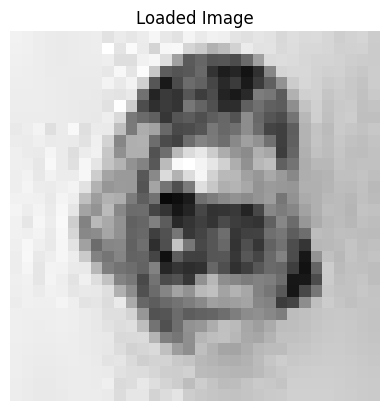

In [ ]:
test_img = 'Garbage/processed_images/metal/metal_100.jpg'
img = ku.load_img(test_img, target_size = (32,32))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = number_to_class[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

---
### Class: Paper

---

1/1 [==============================] - 0s 29ms/step
Probability: 0.95934737
Classified: paper 



Text(0.5, 1.0, 'Loaded Image')

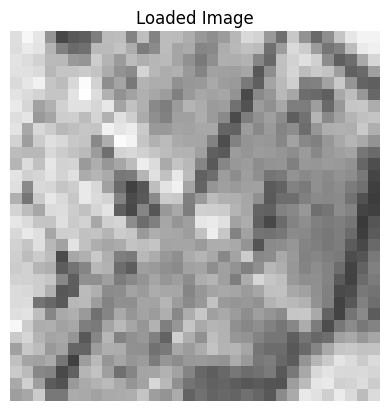

In [ ]:
test_img = 'Garbage/processed_images/paper/paper_324.jpg'
img = ku.load_img(test_img, target_size = (32,32))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = number_to_class[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

---
### Class: Plastic

---

1/1 [==============================] - 0s 28ms/step
Probability: 0.8370965
Classified: plastic 



Text(0.5, 1.0, 'Loaded Image')

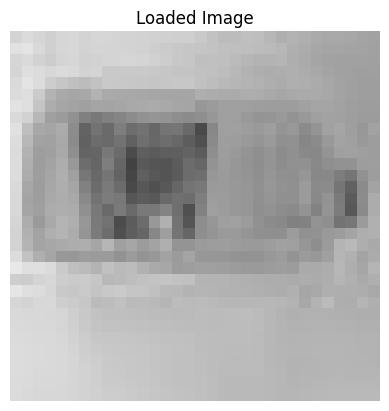

In [ ]:
test_img = 'Garbage/processed_images/plastic/plastic_155.jpg'
img = ku.load_img(test_img, target_size = (32,32))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = number_to_class[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

---
### Class: Trash
---

1/1 [==============================] - 0s 29ms/step
Probability: 0.98495126
Classified: trash 



Text(0.5, 1.0, 'Loaded Image')

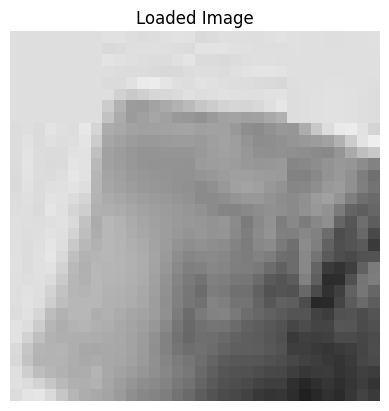

In [ ]:
test_img = 'Garbage/processed_images/trash/trash_032.jpg'
img = ku.load_img(test_img, target_size = (32,32))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = number_to_class[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")